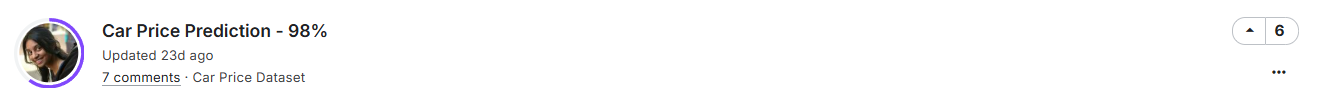

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data=pd.read_csv("../car_price_dataset.csv")
data.head(5)

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


C:\Users\Leaper\AppData\Local\Temp\ipykernel_11060\2512714397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Brand",data=data,palette="Blues")


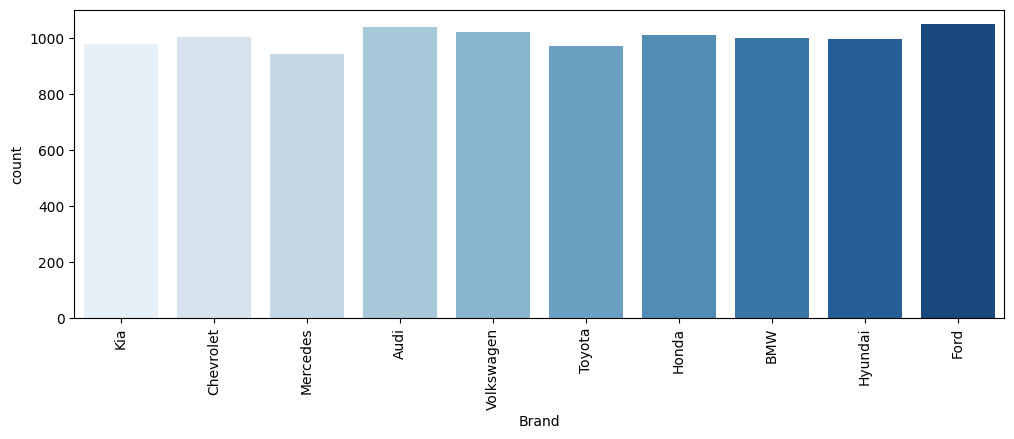

In [4]:
plt.figure(figsize=(12,4))
sns.countplot(x="Brand",data=data,palette="Blues")
plt.xticks(rotation=90)
plt.show()

In [5]:
le=LabelEncoder()
data["Brand"]=le.fit_transform(data["Brand"])
data["Model"]=le.fit_transform(data["Model"])
data["Fuel_Type"]=le.fit_transform(data["Fuel_Type"])
data["Transmission"]=le.fit_transform(data["Transmission"])

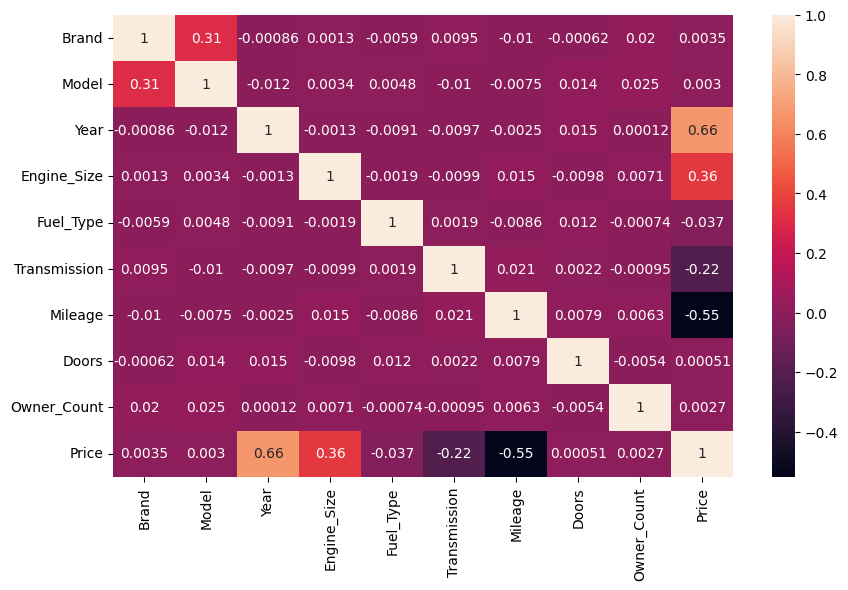

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [7]:
x=data.drop(["Price"],axis=1)
y=data["Price"]
ss=StandardScaler()
x=ss.fit_transform(x)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
}

In [10]:
param_grids = {
    'Ridge': {'alpha': [0.1, 1, 10]},
    'Lasso': {'alpha': [0.1, 1, 10]},
    'RandomForest': {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]},
    'SVR': {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1], 'kernel': ['linear', 'rbf']},
}

In [11]:
results={}
for model_name in models:
    print(f"Tuning hyperparameters for {model_name}...")
    
    grid_search = GridSearchCV(models[model_name], param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    results[model_name] = {'best_params': grid_search.best_params_, 'test_mse': mse,"R2":r2*100}

Tuning hyperparameters for Ridge...
Tuning hyperparameters for Lasso...
Tuning hyperparameters for RandomForest...
Tuning hyperparameters for SVR...


In [12]:
for model_name, result in results.items():
    print(f"{model_name}: Best Params: {result['best_params']}, Accuracy: {result['R2']}")

Ridge: Best Params: {'alpha': 0.1}, Accuracy: 91.09052038490249
Lasso: Best Params: {'alpha': 1}, Accuracy: 91.09185547809912
RandomForest: Best Params: {'max_depth': None, 'n_estimators': 200}, Accuracy: 97.63317285889097
SVR: Best Params: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}, Accuracy: 89.32143284639234


In [15]:
result.head(5)

,Model,Test MSE,R2
0,Ridge,818586.223735,91.090520
1,Lasso,818463.557884,91.091855
2,RandomForest,215464.610218,97.654887
3,SVR,981126.658213,89.321433


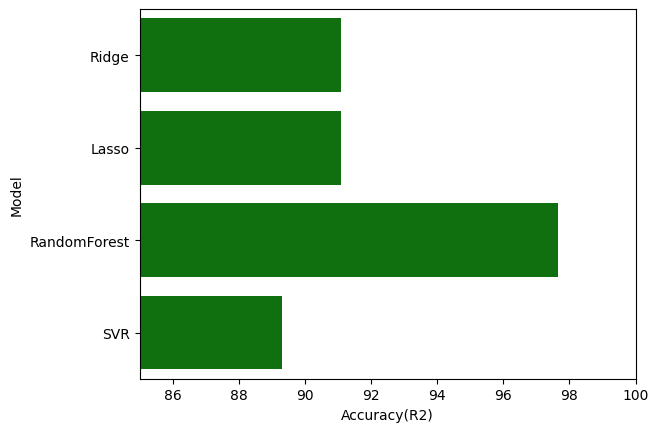

In [16]:
sns.barplot(y="Model",x="R2",data=result,color="green")
plt.xlabel("Accuracy(R2)")
plt.xlim(85,100)
plt.show()